In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn
from matplotlib.patches import Rectangle
import pandas as pd

In [2]:
df = pd.read_csv('data/combined_tweets_filtered.csv')
df.head()

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz,num_tweets
0,1331672421636726791,abmakulec,@AlbertoCairo Clearly my brain operates on a s...,11/25/2020 18:53:41,0,1,1,0,False,234
1,1331629580558487552,abmakulec,@AlbertoCairo The vaccine misinformation being...,11/25/2020 16:03:27,0,1,4,0,False,234
2,1331616851319730180,abmakulec,@sanjaygreddy @FILWD @AlexKale17 @CGDev @RANDC...,11/25/2020 15:12:52,0,0,1,0,False,234
3,1331599424880058369,abmakulec,@FILWD @AlexKale17 @CGDev @RANDCorporation @bm...,11/25/2020 14:03:37,0,0,1,0,False,234
4,1331597345235083264,abmakulec,@FILWD @AlexKale17 @CGDev .@RANDCorporation ma...,11/25/2020 13:55:21,0,1,1,0,False,234


In [3]:
sum_rt = df["retweets"].tolist()
sum_rep = df["replies"].tolist()
sum_likes = df["likes"].tolist()
sum_quotes = df["quotes"].tolist()

engagements = []

for index in range(len(sum_rt)):
    sum_eng = sum_rt[index] + sum_rep[index] + sum_likes[index] + sum_quotes[index]
    engagements.append(sum_eng)

df["engagements"] = engagements
df["engagements"]

0           2
1           5
2           1
3           1
4           2
         ... 
15222      76
15223     947
15224     257
15225     297
15226    3298
Name: engagements, Length: 15227, dtype: int64

In [4]:
viz_df = df.loc[df["has_viz"] == True]
nonviz_df = df.loc[df["has_viz"] == False]

In [5]:
nonviz_df.columns

Index(['tweet_id', 'user', 'text', 'date', 'retweets', 'replies', 'likes',
       'quotes', 'has_viz', 'num_tweets', 'engagements'],
      dtype='object')

In [6]:
noviz = nonviz_df["engagements"].tolist()
viz = viz_df["engagements"].tolist()

data = [noviz, viz]

In [7]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

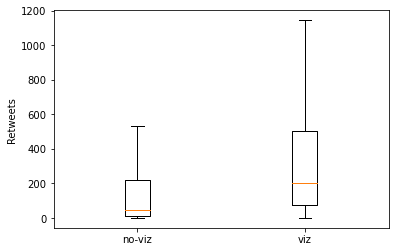

In [8]:
# Creating plot
plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
plt.ylabel("Engagements")
 
# show plot
plt.show()

In [9]:
a = np.histogram(viz)

In [10]:
def buildBins(min = 0, spacing = 1, numbins = 10) :
    ret = [min + float(x)*spacing for x in range(numbins)]
    return ret

def binCenters(bins):
    mids = []
    for i in range(len(bins)-1) :
        lower = bins[i]
        upper = bins[i+1]
        mid = (lower + upper) / 2
        mids.append(mid)
    return mids



0.019999999999999997


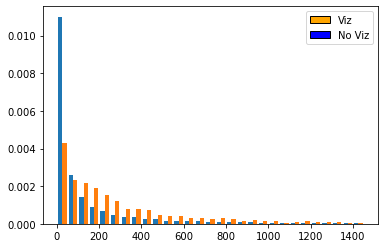

In [11]:
# Build the bins by user pref
bins = buildBins(min = 1, spacing = 50, numbins = 30)

# The top subplot is classic histo
n, x, _ = plt.hist(data, bins = bins, density = True)

colors = ["orange", "blue"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Viz", "No Viz"]
plt.legend(handles, labels)

print(sum(n[1]))
#plt.close()

# # The bottom sublplot is a line 
# plt.subplot(212)
# bin_centers = binCenters(bins)
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.plot(bin_centers, n[1], '-', c='red', label="Viz")
# plt.plot(bin_centers, n[0], '-', c='blue', label="No Viz")
# plt.title("Percent of Tweets (Viz & No Viz) Classified by Number of Retweets")
# plt.xlabel("Number of Retweets")
# plt.ylabel("Percent of Tweets")
# plt.legend(loc="upper right")
# # Show the plots
plt.show()

In [12]:
print(n)

[[1.10061783e-02 2.59488085e-03 1.41571050e-03 9.14386584e-04
  6.93733451e-04 4.88967343e-04 3.72462489e-04 3.37157988e-04
  2.64783760e-04 2.50661959e-04 1.69461606e-04 1.44748455e-04
  1.46513680e-04 1.30626655e-04 1.16504854e-04 1.02383054e-04
  9.35569285e-05 9.70873786e-05 1.07678729e-04 5.82524272e-05
  5.64872021e-05 6.70785525e-05 6.88437776e-05 6.35481024e-05
  5.29567520e-05 5.82524272e-05 4.76610768e-05 4.41306267e-05
  3.53045013e-05]
 [4.31714719e-03 2.33687405e-03 2.14719272e-03 1.90440061e-03
  1.51745068e-03 1.21396055e-03 8.04248862e-04 7.96661608e-04
  7.20789074e-04 4.55235205e-04 4.02124431e-04 4.32473445e-04
  3.03490137e-04 3.18664643e-04 2.65553869e-04 3.26251897e-04
  2.65553869e-04 1.59332322e-04 2.12443096e-04 1.59332322e-04
  1.66919575e-04 6.82852807e-05 1.21396055e-04 1.28983308e-04
  1.13808801e-04 1.21396055e-04 9.86342944e-05 6.82852807e-05
  5.31107739e-05]]


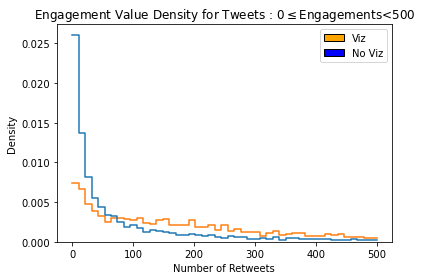

In [18]:
brs = {"Low": (0,500), "Middle": (200,1500), "High": (5000, 30000)}
binrange = brs["Low"]
hp = seaborn.histplot(data,element="step",binrange=binrange,stat='density', common_norm=False, fill=False)

#hp = plt.hist(data, density = True, binrange=(100,1500))
plt.legend(handles, labels)
plt.xlabel("Number of Retweets")
#plt.xticks(np.arange(100, 1400, 200))
plt.title(r"Engagement Value Density for Tweets : $" +str(binrange[0])+"\leq$Engagements<"+str(binrange[1]))
#plt.title(r'$\alpha\leq\beta$')
plt.show(hp)


noviz n = 141
viz n = 753


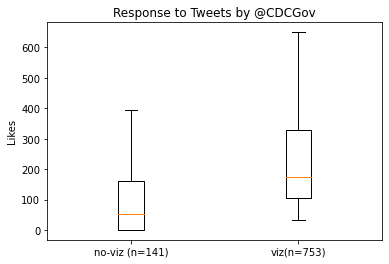

In [14]:
def baw_likes(authorname):
    noviz_func_df = nonviz_df.loc[nonviz_df["user"] == authorname]
    viz_func_df = viz_df.loc[viz_df["user"] == authorname]
    
    noviz = noviz_func_df["likes"].tolist()
    viz = viz_func_df["likes"].tolist()

    data = [noviz, viz]
    
    # Creating plot
    print("noviz n = " + str(len(data[0])))
    print("viz n = " + str(len(data[1])))
    plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz (n=" + str(len(data[0])) + ")", "viz(n=" + str(len(data[1])) + ")"])
    plt.ylabel("Likes")
    plt.title("Response to Tweets by @"+authorname)

    # show plot
    plt.show()
    
baw_likes("CDCGov")

noviz n = 593
viz n = 259


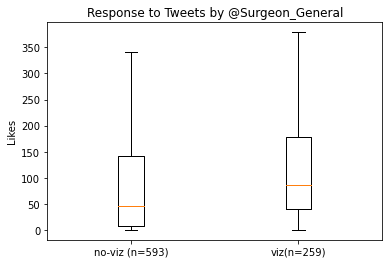

noviz n = 212
viz n = 25


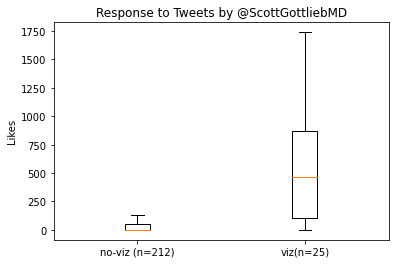

noviz n = 626
viz n = 68


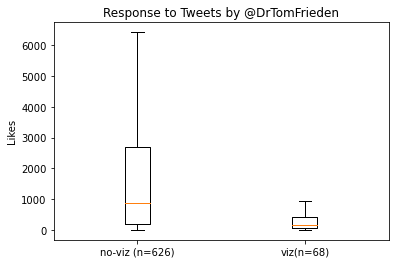

noviz n = 446
viz n = 47


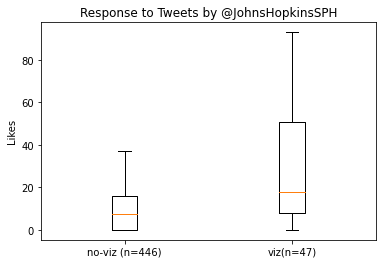

In [15]:
baw_likes("Surgeon_General")
baw_likes("ScottGottliebMD")
baw_likes("DrTomFrieden")
baw_likes("JohnsHopkinsSPH")

In [16]:
novizt = data[0]
vizt = data[1]
summer = 0
for dat in vizt:
    if dat > 1400:
        summer+=1
print(summer/len(vizt) * 100)

7.840392019600979


Text(0.5, 1.0, 'Breakdown of Analyzed Tweets')

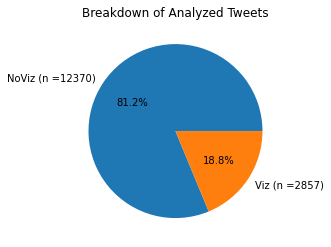

In [20]:
plt.pie([len(novizt), len(vizt)] , labels = ["NoViz (n ="+str(len(novizt))+")", "Viz (n ="+str(len(vizt))+")"], autopct='%.1f%%')

plt.title("Breakdown of Analyzed Tweets")

In [21]:
len(novizt)+len(vizt)

15227